<font color="red"><h1 align='center'> Logistic Regression </h1>

**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df.head(3)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330


#### drop the CASENUM:

In [5]:
df.drop(columns=['CASENUM'],axis=1,inplace=True)
df.shape

(1340, 6)

In [7]:
# checking the description
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
# Checking for missing values:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [11]:
# imputing all the all column with mode
df.CLMSEX.value_counts().index[0]

1.0

In [13]:
# User defined function for imputing the missing values:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
df.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [14]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

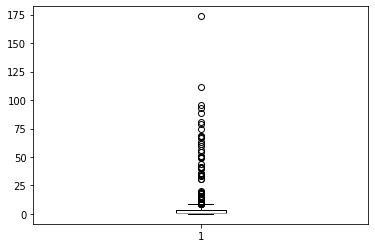

In [16]:
plt.boxplot(df.LOSS)
plt.show()

In [ ]:
## outliers also missing values --> Imputation
## Winsoration --> Outliers are replaced with next small value

Example : [1,2,3,4,5,6,78,89,9000] ---> 9000 as an outlier --> 9000 replaces with 89
- One analysis --> including outliers
- One analysis --> without outliers

In [17]:
# splitting the data
X=df.iloc[:,1:]
y=df.ATTORNEY

In [18]:
# Split the data into training and testing
# Build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
# Build classifier on training data
# Sklearn library :import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train) # Input and output will be passes to the fit method

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Predicting on train data:
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf=confusion_matrix(y_train,y_train_pred)

In [29]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

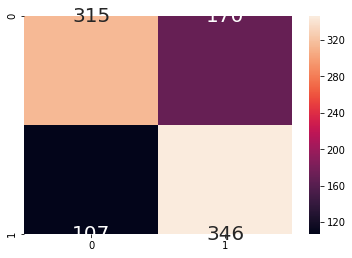

In [30]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':
                                                                                   '20'})

In [31]:
## Accuracy --> TP+TN/(TP+TN+FP+FN)
## correct predictions/total predictions
(315+345)/(315+170+108+345)

0.7036247334754797

In [32]:
### 
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [33]:
X_train.shape

(938, 5)

In [34]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
744,1.0,1.0,0.0,40.0,5.091
363,1.0,1.0,0.0,46.0,173.604
10,1.0,1.0,0.0,37.0,6.190
971,0.0,1.0,0.0,68.0,9.008
634,1.0,1.0,1.0,10.0,8.053
...,...,...,...,...,...
715,0.0,1.0,0.0,13.0,6.979
905,0.0,1.0,0.0,10.0,3.330
1096,0.0,1.0,0.0,50.0,3.095
235,1.0,1.0,0.0,17.0,1.619


In [39]:
tp=conf[0][0]
fp=conf[0][1]
fn=conf[1][0]

In [36]:
## Precision:
Precision =tp/(tp+fp)
Precision

0.6494845360824743

In [37]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [41]:
Recall=tp/(tp+fn)
Recall

0.7464454976303317